In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

from sklearn.datasets import load_iris
from matplotlib import rc
import random
import collections

## Tarea 3

In [2]:
iris2 = load_iris()
X_1 = iris2.data
Y_1 = iris2.target

In [3]:
f1=0
f2=1
X_1 = X_1[:,f1:f2+1]

In [4]:
random_list = random.sample(range(0,150,1),150)

In [5]:
X_1=X_1[random_list,:]
Y_1=Y_1[random_list]

In [6]:
X_1_train=X_1[:120,:]
X_1_test=X_1[120:,:]
Y_1_train=Y_1[:120]
Y_1_test=Y_1[120:]

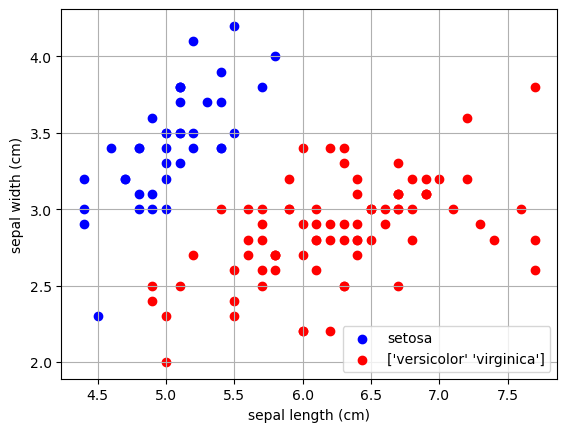

In [7]:
fig, ax = plt.subplots()

line, = ax.plot([], [], 'k-')  
#se genera en vacio para poder iterarla (con la coma solo recibes el priemer elemento de la tupla)

ax.scatter(X_1_train[Y_1_train==0, 0], X_1_train[Y_1_train==0, 1], c='b', label=iris2.target_names[0])
ax.scatter(X_1_train[Y_1_train>0, 0], X_1_train[Y_1_train>0, 1], c='r', label=iris2.target_names[[1,2]])
ax.legend(loc='lower right')

ax.set_xlabel(iris2.feature_names[f1])
#ax.set_xlim(0, 6)
ax.set_ylabel(iris2.feature_names[f2])
#ax.set_ylim(0, 2)

x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)

ax.grid(True)

In [8]:
def perceptron(data, target, T):
    theta = np.array([0,0])
    theta_0 = 0
    n = np.shape(data)[0]
    lista_planos=[]
    for i in range(1,T+1,1):
        for j in range (0,n,1):
            if target[j]==np.unique(target)[0]:
                aux=-1
            else:
                aux=1
            validation=aux*(np.dot(data[j],theta)+theta_0)
            if validation<=0:
                theta = theta + aux*data[j]
                theta_0 = theta_0 + aux
                lista_planos.append((-theta_0/theta[1],-theta[0]/theta[1]))
    return theta, theta_0, lista_planos

In [9]:
theta,theta_0,lista_thetas=perceptron(X_1_train,Y_1_train,1000)

/var/folders/9j/5g2kcd8x5y1gth6pxchhjdp80000gn/T/ipykernel_3068/2291195343.py:16: RuntimeWarning: invalid value encountered in double_scalars
  lista_planos.append((-theta_0/theta[1],-theta[0]/theta[1]))
/var/folders/9j/5g2kcd8x5y1gth6pxchhjdp80000gn/T/ipykernel_3068/2291195343.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  lista_planos.append((-theta_0/theta[1],-theta[0]/theta[1]))


In [10]:
lista_thetas=lista_thetas[-50:]

In [11]:
def anima(i):
    y = lista_thetas[i][0] + lista_thetas[i][1] * x
    line.set_data(x, y)
    return line,

animacion = animation.FuncAnimation(fig, anima, frames=len(lista_thetas), interval=100, blit=True)

In [12]:
rc('animation', html='jshtml')
animacion

In [13]:
def classifier(theta,theta_0,test_data,test_target):
    n = np.shape(test_data)[0]
    list_classification=[]
    for j in range (0,n,1):
        dot_product=(np.dot(test_data[j],theta)+theta_0)
        if dot_product<=0:
            list_classification.append(0)
        else:
            list_classification.append(1)
    return list_classification

In [14]:
list_classification=classifier(theta,theta_0,X_1_test,Y_1_test)

In [15]:
Y_1_test[Y_1_test>0]=1

In [16]:
result=list_classification==Y_1_test

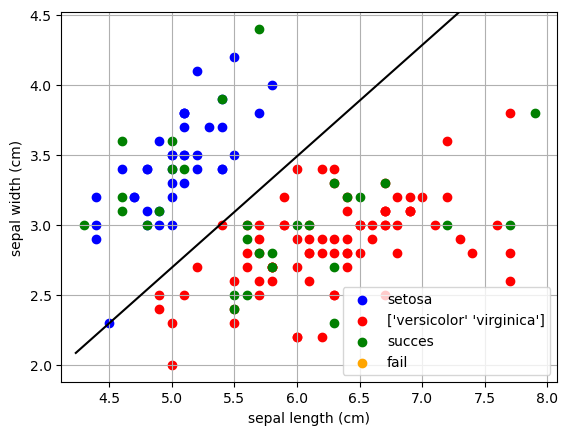

In [17]:
ax.scatter(X_1_test[result==True, 0], X_1_test[result==True, 1], c='g', label='succes')
ax.scatter(X_1_test[result==False, 0], X_1_test[result==False, 1], c='orange', label='fail')
ax.legend(loc='lower right')
fig